### 1. Billboard 100 playlist

In [1]:
!pip install bs4

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <!-- Add to home screen for iOS -->
   <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
   <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
   <!-- Tile icons for Windows -->
   <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
   <meta content="https://www.billboard.com/wp
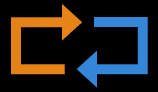

In [3]:
r = requests.get('https://www.billboard.com/charts/hot-100/').content
soup = BeautifulSoup(r, 'html.parser')
print(soup.prettify())

In [4]:
#getting all the artists
artists = soup.find_all("span", attrs={"class": "c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only"})
artists_names = [artist.get_text(strip=True) for artist in artists] 

# getting all the songs 
songs = soup.find_all("h3", attrs={"class": "c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only"})
songs_titles = [song.get_text(strip=True) for song in songs]

In [5]:
billboard99 = pd.DataFrame((zip(artists_names, songs_titles)), columns=["artist name", "song name"]) #creating dataframe with all the artists and songs

In [6]:
# getting the name of no 1 artist
artist1 = soup.find_all("span", attrs={"class": "c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet"})
artist1_name = [artist.get_text(strip=True) for artist in artist1] 

# getting the title of the song
song1 = soup.find_all("h3", attrs={"class": "c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet"})
song1_title = [song.get_text(strip=True) for song in song1] 

# adding 99 and 1 songs and artists lists together
artists_names = artist1_name + artists_names
songs_titles = song1_title + songs_titles

In [7]:
#creating dataframe with all 100 songs and artists
billboard100 = pd.DataFrame((zip(artists_names, songs_titles)), columns=["artist name", "song name"]) 

### 2. Spotify playlists

In [8]:
!pip install spotipy

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="b9155a56e0f54f0fbb99dae35eb54732",
                                                           client_secret="65e11367dd3848aeb711ba8cb5f9dc50"))

In [10]:
#function in case the playlist has more than 100 songs
def get_playlist_tracks(username, playlist_id):

    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']

    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

    return tracks

In [11]:
#function to get song titles & song ids:
def get_songs_and_ids_from_playlist(playlist_id):

    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)

    songs = []
    songs_ids = []

    for track in tracks_from_playlist:
        songs.append(track['track']['name'])
        songs_ids.append(track['track']['uri'])

    return list(songs), list(songs_ids)

In [12]:
#function to get artists and artists_ids
def get_artists_and_ids_from_playlist(playlist_id):

    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)

    artists = []
    artists_ids = []

    for track in tracks_from_playlist:
        artists_info = track['track']['artists']

        for artist_info in artists_info:
            artists.append(artist_info['name'])
            artists_ids.append(artist_info['id'])

    return list(set(artists)), list(set(artists_ids))

In [13]:
#function to get top songs from all the artists from the list
def get_top_songs_from_artists_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    artists_ids = []
    
    for track in tracks_from_playlist:
        artists_info = track['track']['artists']

        for artist_info in artists_info:
            artists_ids.append(artist_info['id'])

    song_titles = []
    song_uri = []

    for artist_id in artists_ids:
        results = sp.artist_top_tracks(artist_id, country='US')
        top_tracks = results['tracks']
        
        for top_track in top_tracks:
            song_titles.append(top_track['name'])
            song_uri.append(top_track['uri'])

    return list(artists_ids), list(song_titles), list(song_uri)

In [14]:
playlists = ['37i9dQZF1DWUZv12GM5cFk', '37i9dQZF1DXbITWG1ZJKYt', '37i9dQZF1DX9LbdoYID5v7', '2JajYJtwVXgEyzZqCyoL93', '37i9dQZF1DWTSKFpOdYF1r']

In [15]:
#creating empty lists to store data
all_song_titles = []
all_song_uris = []

#looping through playlists to get required information
for playlist in playlists:
    #extracting artists and artist ids
    artists = []
    artist_ids = []
    artists, artist_ids = get_artists_and_ids_from_playlist(playlist)

    #extracting songs and song ids
    songs = []
    song_ids = []
    songs, song_ids = get_songs_and_ids_from_playlist(playlist)

    #adding song data to the lists
    all_song_titles.extend(songs)
    all_song_uris.extend(song_ids)

    #extracting top songs from artists in the original playlist
    artists2 = []
    top_songs = []
    top_songs_uri = []
    artists2, top_songs, top_songs_uri = get_top_songs_from_artists_from_playlist(playlist)

    #adding top songs data to the lists
    all_song_titles.extend(top_songs)
    all_song_uris.extend(top_songs_uri)

In [16]:
#creating a dataframe from the accumulated data
spotify_df = pd.DataFrame({'song title': all_song_titles, 'song uri': all_song_uris})
spotify_df

,song title,song uri
0,Oops!...I Did It Again,spotify:track:6naxalmIoLFWR0siv8dnQQ
1,All The Small Things,spotify:track:2m1hi0nfMR9vdGC8UcrnwU
2,Breathe,spotify:track:3y4LxiYMgDl4RethdzpmNe
3,It's My Life,spotify:track:0v1XpBHnsbkCn7iJ9Ucr1l
4,Bye Bye Bye,spotify:track:62bOmKYxYg7dhrC6gH9vFn
...,...,...
7618,Mayor Of Simpleton - 2001 Remaster,spotify:track:39eEVHdCHNTmfg1KzEDxvK
7619,Ballad Of Peter Pumpkinhead - 2001 Remaster,spotify:track:50GQrTJ85qG7wSPoGjvuCM
7620,Grass - Remastered 2001,spotify:track:4GpmzLeUrLirnvzjb1epVy
7621,"That's Really Super, Supergirl - Remastered 2001",spotify:track:1QSe34AvBgTBTpRK3RLpQe


In [17]:
#getting features from Spotify
start = 0
spotify_features = pd.DataFrame()

for stop in range(0, len(all_song_uris)+100, 100):
    if start != stop:
        new_df = pd.json_normalize(sp.audio_features(all_song_uris[start:stop]))
        
        spotify_features = pd.concat([new_df, spotify_features])
        start = stop

spotify_features.reset_index()

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.174,0.900,11,-2.798,1,0.0456,0.00012,0.933000,0.3240,0.543,138.914,audio_features,7hyvnzr9Vba4tlvIs9ZHlg,spotify:track:7hyvnzr9Vba4tlvIs9ZHlg,https://api.spotify.com/v1/tracks/7hyvnzr9Vba4...,https://api.spotify.com/v1/audio-analysis/7hyv...,102333,4
1,1,0.454,0.498,7,-10.834,1,0.0289,0.00160,0.739000,0.2250,0.306,104.430,audio_features,4B9XskceIbuLuqKD0vWRCN,spotify:track:4B9XskceIbuLuqKD0vWRCN,https://api.spotify.com/v1/tracks/4B9XskceIbuL...,https://api.spotify.com/v1/audio-analysis/4B9X...,165813,4
2,2,0.591,0.370,8,-13.750,1,0.0292,0.34400,0.343000,0.0913,0.436,93.301,audio_features,075m5JKJVuEhXyVBKNdhhz,spotify:track:075m5JKJVuEhXyVBKNdhhz,https://api.spotify.com/v1/tracks/075m5JKJVuEh...,https://api.spotify.com/v1/audio-analysis/075m...,163693,4
3,3,0.375,0.600,11,-9.313,1,0.0330,0.09660,0.000972,0.7590,0.916,169.976,audio_features,4tPHC7YsU3LInUYcIe2UIi,spotify:track:4tPHC7YsU3LInUYcIe2UIi,https://api.spotify.com/v1/tracks/4tPHC7YsU3LI...,https://api.spotify.com/v1/audio-analysis/4tPH...,151693,4
4,4,0.349,0.967,6,-9.028,1,0.0537,0.00864,0.000000,0.2600,0.619,189.827,audio_features,79qBHhaJRde8ifVIK1VA77,spotify:track:79qBHhaJRde8ifVIK1VA77,https://api.spotify.com/v1/tracks/79qBHhaJRde8...,https://api.spotify.com/v1/audio-analysis/79qB...,131440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7618,95,0.597,0.793,7,-7.006,1,0.0361,0.01230,0.000005,0.1570,0.755,167.200,audio_features,6MnWfOgKRkQtY1pRgoTwB1,spotify:track:6MnWfOgKRkQtY1pRgoTwB1,https://api.spotify.com/v1/tracks/6MnWfOgKRkQt...,https://api.spotify.com/v1/audio-analysis/6MnW...,243266,4
7619,96,0.581,0.607,4,-8.458,1,0.0280,0.18900,0.000002,0.0882,0.213,102.030,audio_features,60g4sp8i3gXSb1EkphMl1g,spotify:track:60g4sp8i3gXSb1EkphMl1g,https://api.spotify.com/v1/tracks/60g4sp8i3gXS...,https://api.spotify.com/v1/audio-analysis/60g4...,281467,4
7620,97,0.807,0.498,10,-9.910,0,0.0756,0.25900,0.000030,0.0618,0.857,99.001,audio_features,0AcLrSfAEBQcUnHOTm5pXg,spotify:track:0AcLrSfAEBQcUnHOTm5pXg,https://api.spotify.com/v1/tracks/0AcLrSfAEBQc...,https://api.spotify.com/v1/audio-analysis/0AcL...,277413,4
7621,98,0.577,0.654,0,-7.900,0,0.0321,0.01430,0.000000,0.1140,0.130,111.993,audio_features,4WhyHQ2BXi2VU1iaFbF6jv,spotify:track:4WhyHQ2BXi2VU1iaFbF6jv,https://api.spotify.com/v1/tracks/4WhyHQ2BXi2V...,https://api.spotify.com/v1/audio-analysis/4Why...,285893,4


In [18]:
#saving uri from spotify_features dataframe as a list
song_ids = spotify_features['id'].tolist()
song_ids

['7hyvnzr9Vba4tlvIs9ZHlg',
 '4B9XskceIbuLuqKD0vWRCN',
 '075m5JKJVuEhXyVBKNdhhz',
 '4tPHC7YsU3LInUYcIe2UIi',
 '79qBHhaJRde8ifVIK1VA77',
 '2n7ldKXEYiKrcF9HC9nQP8',
 '4AYKXh7j36Q4bLvK4x2Z86',
 '3IB3j5cgZZKjjXGUNk14RM',
 '6VRHlbn4dOvpHOSnhUCxQx',
 '7BIXtOGgOc5TmvjaK1bNBf',
 '4xAxbQhYpzkphA0KvNm78P',
 '6rgP5FA203u31FqOsTISuy',
 '6Xqag7PIsEpqsSyZGx88v0',
 '1XT5kxg6Tk0ukCO2vBQN4v',
 '6nFdjV1Ko66O111x74K2kn',
 '0XDv7SLyMkGcAnb12fMHa1',
 '3jJm28Q9MEhnRbxk2LdfkK',
 '6mBoE4SeqM0zYBKFvPB5Pd',
 '39eEVHdCHNTmfg1KzEDxvK',
 '50GQrTJ85qG7wSPoGjvuCM',
 '4GpmzLeUrLirnvzjb1epVy',
 '1QSe34AvBgTBTpRK3RLpQe',
 '0pG73CkloiWrsiQlSYJDj8',
 '6vLtfHLVba7azpwIHQVCPi',
 '7FcnFSwGquIEDhJ18tHWd4',
 '1OlR8gWxMgHIb5bduxTz2q',
 '3xfOF1wyjUZocifZ5WLeFx',
 '4m135IefwsN8Y1uZqd0JR6',
 '7r8A2uC6AV3F6M4TRugPSf',
 '1nydxVjS29r7sziRiDS7Mk',
 '6PNy4eexagMfQN7L77dkig',
 '3GfiHtW7xq3EMwYlx5WMda',
 '3wwN6IJvNhomas8tSHIcAY',
 '6QHLjlNN0EjQiwu3MBk88v',
 '2Qkqi00Ha7h5ZvbWBEHqUy',
 '0yq4KRS9gdDqy7VquDL8ZS',
 '39lSeqnyjZJejRuaREfyLL',
 

In [19]:
all_titles = []
all_artists = []

# splitting song_ids into chunks to fetch multiple tracks at once 
chunk_size = 50
for i in range(0, len(song_ids), chunk_size):
    song_id_chunk = song_ids[i:i+chunk_size]
    
    # fetching track information 
    results = sp.tracks(song_id_chunk)
    
    # looping through the results for each track and appending results 
    for track in results['tracks']:
        title = track['name']
        all_titles.append(title)
        
        artist_info = track['artists']
        artist_names = [artist['name'] for artist in artist_info]
        all_artists.append(artist_names)

In [20]:
spotify_features['song'] = all_titles
spotify_features['artist'] = all_artists
spotify_features = spotify_features.reset_index()

In [21]:
spotify_features #final dataset with audio features,song titles and artists

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song,artist
0,0,0.174,0.900,11,-2.798,1,0.0456,0.00012,0.933000,0.3240,...,138.914,audio_features,7hyvnzr9Vba4tlvIs9ZHlg,spotify:track:7hyvnzr9Vba4tlvIs9ZHlg,https://api.spotify.com/v1/tracks/7hyvnzr9Vba4...,https://api.spotify.com/v1/audio-analysis/7hyv...,102333,4,Taste of Cindy,[The Jesus and Mary Chain]
1,1,0.454,0.498,7,-10.834,1,0.0289,0.00160,0.739000,0.2250,...,104.430,audio_features,4B9XskceIbuLuqKD0vWRCN,spotify:track:4B9XskceIbuLuqKD0vWRCN,https://api.spotify.com/v1/tracks/4B9XskceIbuL...,https://api.spotify.com/v1/audio-analysis/4B9X...,165813,4,Cut Dead,[The Jesus and Mary Chain]
2,2,0.591,0.370,8,-13.750,1,0.0292,0.34400,0.343000,0.0913,...,93.301,audio_features,075m5JKJVuEhXyVBKNdhhz,spotify:track:075m5JKJVuEhXyVBKNdhhz,https://api.spotify.com/v1/tracks/075m5JKJVuEh...,https://api.spotify.com/v1/audio-analysis/075m...,163693,4,Deep One Perfect Morning,[The Jesus and Mary Chain]
3,3,0.375,0.600,11,-9.313,1,0.0330,0.09660,0.000972,0.7590,...,169.976,audio_features,4tPHC7YsU3LInUYcIe2UIi,spotify:track:4tPHC7YsU3LInUYcIe2UIi,https://api.spotify.com/v1/tracks/4tPHC7YsU3LI...,https://api.spotify.com/v1/audio-analysis/4tPH...,151693,4,Crash,[The Primitives]
4,4,0.349,0.967,6,-9.028,1,0.0537,0.00864,0.000000,0.2600,...,189.827,audio_features,79qBHhaJRde8ifVIK1VA77,spotify:track:79qBHhaJRde8ifVIK1VA77,https://api.spotify.com/v1/tracks/79qBHhaJRde8...,https://api.spotify.com/v1/audio-analysis/79qB...,131440,4,Spacehead,[The Primitives]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7618,95,0.597,0.793,7,-7.006,1,0.0361,0.01230,0.000005,0.1570,...,167.200,audio_features,6MnWfOgKRkQtY1pRgoTwB1,spotify:track:6MnWfOgKRkQtY1pRgoTwB1,https://api.spotify.com/v1/tracks/6MnWfOgKRkQt...,https://api.spotify.com/v1/audio-analysis/6MnW...,243266,4,Reach,[S Club]
7619,96,0.581,0.607,4,-8.458,1,0.0280,0.18900,0.000002,0.0882,...,102.030,audio_features,60g4sp8i3gXSb1EkphMl1g,spotify:track:60g4sp8i3gXSb1EkphMl1g,https://api.spotify.com/v1/tracks/60g4sp8i3gXS...,https://api.spotify.com/v1/audio-analysis/60g4...,281467,4,Crash and Burn,[Savage Garden]
7620,97,0.807,0.498,10,-9.910,0,0.0756,0.25900,0.000030,0.0618,...,99.001,audio_features,0AcLrSfAEBQcUnHOTm5pXg,spotify:track:0AcLrSfAEBQcUnHOTm5pXg,https://api.spotify.com/v1/tracks/0AcLrSfAEBQc...,https://api.spotify.com/v1/audio-analysis/0AcL...,277413,4,Get It On Tonite,[Montell Jordan]
7621,98,0.577,0.654,0,-7.900,0,0.0321,0.01430,0.000000,0.1140,...,111.993,audio_features,4WhyHQ2BXi2VU1iaFbF6jv,spotify:track:4WhyHQ2BXi2VU1iaFbF6jv,https://api.spotify.com/v1/tracks/4WhyHQ2BXi2V...,https://api.spotify.com/v1/audio-analysis/4Why...,285893,4,Desert Rose,"[Sting, Cheb Mami]"


### Prototype: 
##### Check if inputted song is in Billboard Hot 100 playlist, if yes, return another song from Billboard playlist

In [26]:
user_title = input("Enter a song title: ")
user_artist = input("Enter the artist name: ")

Enter a song title: Vampire
Enter the artist name: Olivia Rodrigo


In [27]:
# Check if the user's input is in the billboard_df
if (billboard100['song name'] == user_title).any() and (billboard100['artist name'] == user_artist).any():
    another_song = billboard100[(billboard100['song name'] != user_title) | (billboard100['artist name'] != user_artist)].sample(1)
    print(f"You might also like:\nSong: {another_song['song name'].values[0]}\nArtist: {another_song['artist name'].values[0]}")
else:
    print("For the recommendation please check Spotify database.")

You might also like:
Song: Barbie World
Artist: Nicki Minaj & Ice Spice With Aqua


### Spotify dataset - clustering

In [28]:
x = spotify_features[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = spotify_features['artist']

In [29]:
scaler = StandardScaler()

x_prep = scaler.fit_transform(x)

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(x_prep)

clusters = kmeans.predict(x_prep)

scaled_df = pd.DataFrame(x_prep, columns=x.columns)
scaled_df.reset_index(drop=True, inplace=True)
scaled_df['song'] = spotify_features['song']
scaled_df['artist'] = spotify_features['artist']
scaled_df['cluster'] = clusters
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song,artist,cluster
0,-2.506252,1.325932,1.677921,1.456816,0.792998,-0.206837,-1.141337,2.435873,1.100328,0.236088,0.725267,Taste of Cindy,[The Jesus and Mary Chain],9
1,-0.572971,-0.036899,0.544488,0.006386,0.792998,-0.550794,-1.137528,1.804832,0.380734,-0.743100,-0.415777,Cut Dead,[The Jesus and Mary Chain],9
2,0.372955,-0.470835,0.827846,-0.519927,0.792998,-0.544616,-0.256366,0.516730,-0.591080,-0.205993,-0.784025,Deep One Perfect Morning,[The Jesus and Mary Chain],0
3,-1.118433,0.308894,1.677921,0.280914,0.792998,-0.466350,-0.893047,-0.595813,4.262176,1.777173,1.753080,Crash,[The Primitives],5
4,-1.297952,1.553070,0.261130,0.332354,0.792998,-0.040007,-1.119411,-0.598975,0.635136,0.550089,2.409931,Spacehead,[The Primitives],9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7618,0.414382,0.963188,0.544488,0.697308,0.792998,-0.402501,-1.109992,-0.598957,-0.113532,1.111986,1.661224,Reach,[S Club],1
7619,0.303909,0.332625,-0.305587,0.435234,0.792998,-0.569331,-0.655257,-0.598970,-0.613612,-1.127338,-0.495190,Crash and Burn,[Savage Garden],9
7620,1.864343,-0.036899,1.394563,0.173160,-1.261037,0.411051,-0.475113,-0.598876,-0.805504,1.533409,-0.595417,Get It On Tonite,[Montell Jordan],2
7621,0.276291,0.491961,-1.439020,0.535948,-1.261037,-0.484886,-1.104845,-0.598975,-0.426082,-1.470261,-0.165524,Desert Rose,"[Sting, Cheb Mami]",6


### Song recommender 

In [ ]:
def recommend_song():
    # get song id
    song_name = input('Choose a song: ')
    results = sp.search(q=f'track:{song_name}', limit=1)
    track_id = results['tracks']['items'][0]['id']
    # get song features with the obtained id
    audio_features = sp.audio_features(track_id)
    # create dataframe
    df_ = pd.DataFrame(audio_features)
    new_features = df_[x.columns]
    # scale features
    scaled_x = scaler.transform(new_features)
    # predict cluster
    cluster = kmeans.predict(scaled_x)
    # filter dataset to predicted cluster
    filtered_df = np.array(scaled_df[scaled_df['cluster'] == cluster[0]][x.columns], order="C")
    # get closest song from filtered dataset
    closest, _ = pairwise_distances_argmin_min(scaled_x, filtered_df)
    # return it in a readable way
    print('\n[RECOMMENDED SONG]')
    return ' - '.join([str(scaled_df.loc[closest]['song'].values[0]), str(scaled_df.loc[closest]['artist'].values[0])])

In [35]:
def recommend_song():
    # get song title and artist from the user
    song_title = input('Enter the song title: ')
    artist_name = input('Enter the artist name: ')
    
    # search for the song using song title and artist
    query = f'track:{song_title} artist:{artist_name}'
    results = sp.search(q=query, limit=1)
    
    if results and 'tracks' in results and 'items' in results['tracks'] and len(results['tracks']['items']) > 0:
        # extract the song id
        track_id = results['tracks']['items'][0]['id']
        
        # get song features with this id
        audio_features = sp.audio_features(track_id)
        
        if audio_features:
            # create a DataFrame
            df_ = pd.DataFrame(audio_features)
            new_features = df_[x.columns]
            
            # scale features
            scaled_x = scaler.transform(new_features)
            
            # predict cluster
            cluster = kmeans.predict(scaled_x)
            
            # filter dataset to predicted cluster
            filtered_df = np.array(scaled_df[scaled_df['cluster'] == cluster[0]][x.columns], order="C")
            
            # get closest song from filtered dataset
            closest, _ = pairwise_distances_argmin_min(scaled_x, filtered_df)
            
            if len(closest) > 0:
                # return recommended song in a readable way
                recommended_song = scaled_df.loc[closest[0]]
                return f'RECOMMENDED SONG: {recommended_song["song"]} from {", ".join(recommended_song["artist"])}'
    
    return '[RECOMMENDED SONG] Sorry, it seems like your song is one and only. I can not find anything similar to it.'

In [36]:
recommend_song()

Enter the song title: Winning Streak
Enter the artist name: Glen Hansard


"RECOMMENDED SONG: Patience from Guns N' Roses"